## Converting formats

In [1]:
# from pydub import AudioSegment
# audio = AudioSegment.from_file('c1pt2.m4a')

# import ffmpeg
# from pydub import AudioSegment

# def convert_to_wav(input_file, output_file):
#     # Load the audio file

#     print(input_file)

#     audio = AudioSegment.from_file(input_file)

#     # Set the output format to WAV
#     audio = audio.set_frame_rate(44100)
#     audio = audio.set_channels(2)
#     audio = audio.set_sample_width(2)

#     # Export the audio as a WAV file
#     audio.export(output_file, format='wav')

# input_file = "c1 pt 2.m4a"
# output_file = "output.wav"

# convert_to_wav(input_file, output_file)



## Classification

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# # 1. Load the data
import pandas as pd 
data = pd.read_csv('columbian_chilean_100.csv', index_col=0)
X = data.values
y = [1 if 'Chilean' in idx  else 0 for idx in list(data.index)]

# 2. Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 3. Instantiate a model
model = KNeighborsClassifier()

# 4. Fit a model
model.fit(X_train, y_train)

# 5. Predict on the test set
preds = model.predict(X_test)

# 6. Print classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.63      0.95      0.75       467
           1       0.79      0.25      0.38       355

    accuracy                           0.65       822
   macro avg       0.71      0.60      0.57       822
weighted avg       0.70      0.65      0.59       822



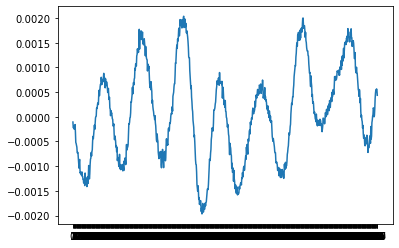

In [29]:
plt.plot(data.iloc[0])

In [3]:
pd.Series(preds).value_counts()

0    710
1    112
dtype: int64

In [8]:
import librosa
import numpy as np
from scipy.io import wavfile

audiofiles = ["sample1reg.wav", "sample1sheismo.wav", "sample2reg.wav", "sample2sheismo.wav"]

predictions = []

for fname in audiofiles: 

    # Load the .wav file
    sample_rate, audio_data = wavfile.read(fname)

    # Preprocess the audio data
    # ... (add your preprocessing code here)

    # Reshape the audio data to match the model's input shape
    reshaped_audio_data = audio_data.reshape(1, -1)
    reshaped_audio_data = reshaped_audio_data[0][:X_train.shape[1]].reshape(1, -1)

    # Make predictions using the model
    predictions.append(model.predict(reshaped_audio_data)[0])

# Print the predictions
print(predictions)



[0, 0, 0, 0]


In [16]:
reshaped_audio_data = audio_data.reshape(1, -1)
reshaped_audio_data = reshaped_audio_data[0][:X_train.shape[1]].reshape(1, -1)
reshaped_audio_data.shape

(1, 850)

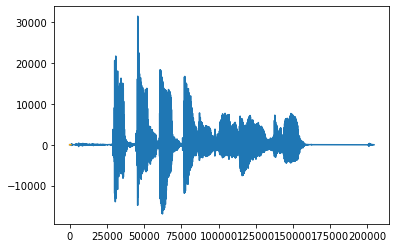

In [24]:
plt.plot(audio_data);

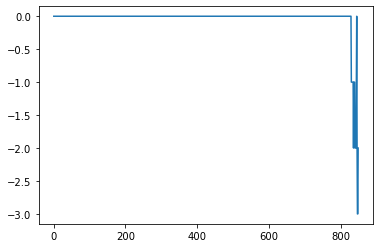

In [26]:

plt.plot(reshaped_audio_data[0])